# Initial Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# Load the dataset
df = pd.read_csv('gendered_data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Additional dataset information
print('Data Set Info')
print(df.info())

# Describe the dataset
print("\nDescribe Data Set")
print(df.describe(include='all'))

# Get unique values count for each column
print("\nUnique Values:")
print(df.nunique())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

### Distribution of Categorical Features

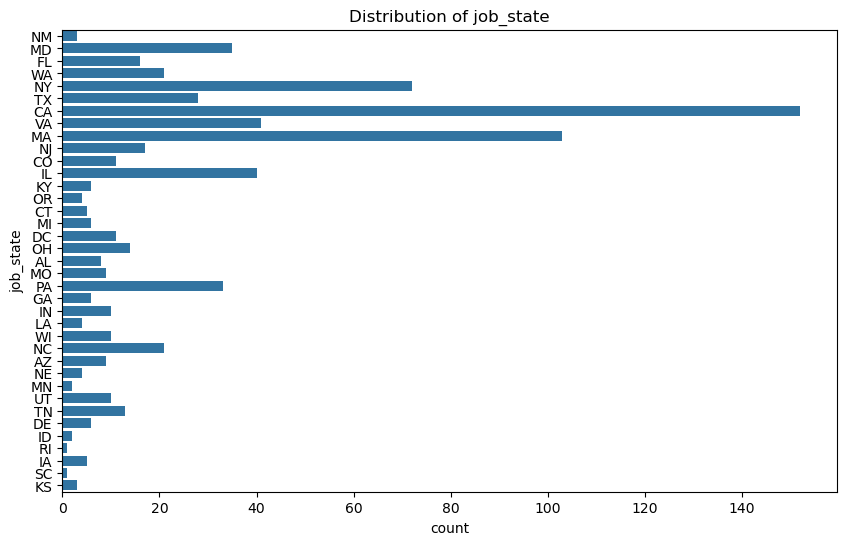

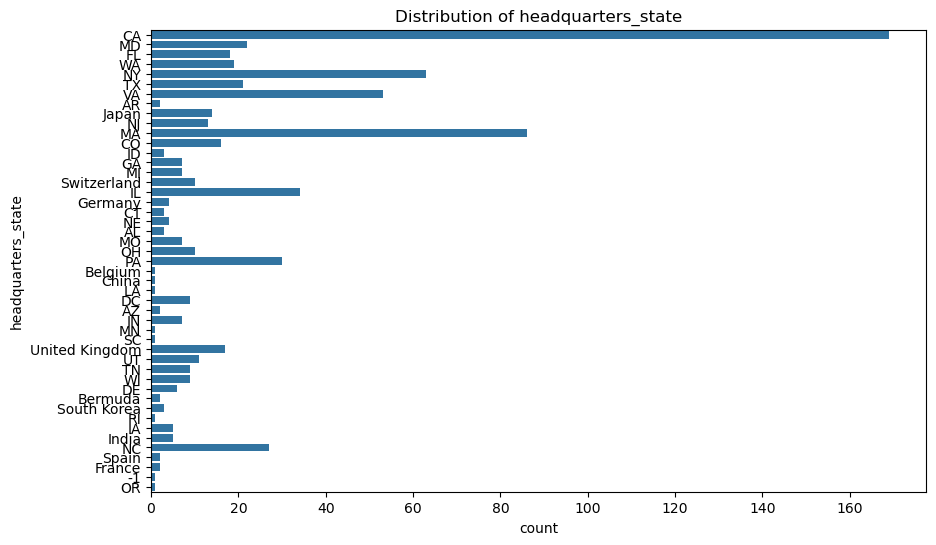

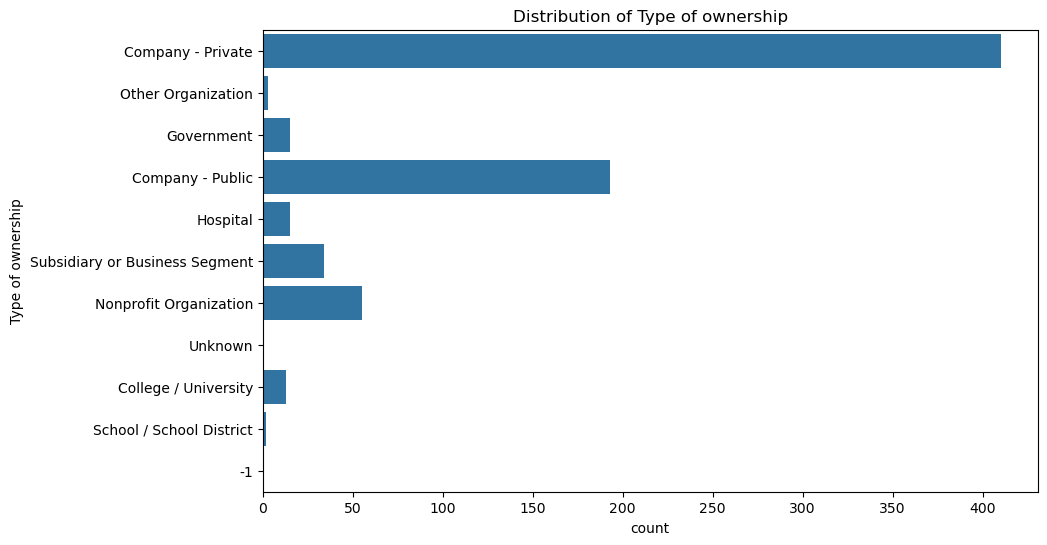

ValueError: Could not interpret value `IndustrySector` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [5]:
# List of categorical features to analyze remove industry for poor visuals
categorical_features = [
    'job_state', 'headquarters_state', 'Type of ownership', 'Industry'
    'Sector', 'job_simp', 'seniority', 'num_comp'
]

# Plot distribution of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
# Summarize all distributions

# Number of features
n_features = len(categorical_features)

# Determine the grid size for subplots
ncols = 1  # Number of columns in the grid
nrows = (n_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution of each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### Binary Features

In [ ]:
# List of features with only 2 unique values
binary_features = ['hourly', 'employer_provided', 'same_state', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']

# Determine the number of rows and columns for subplots
num_features = len(binary_features)
num_cols = 3  # Adjust this number based on how many pie charts you want per row
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each pie chart
for i, feature in enumerate(binary_features):
    ax = axes[i]
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(f'Proportion of {feature}')
    ax.set_ylabel('')  # Hide y-label for pie charts

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

''

### Distribution of Quantitative Features

In [ ]:
# List of quantitative features to analyze
quantitative_features = [
    'Rating', 'Founded', 'min_salary', 
    'max_salary', 'avg_salary', 'age', 
    'desc_len', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio'
]

# Number of features
n_features = len(quantitative_features)

# Determine the grid size for subplots
ncols = 2  # Number of columns in the grid
nrows = (n_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution of each quantitative feature
for i, feature in enumerate(quantitative_features):
    # Exclude values that are -1
    data_to_plot = df[df[feature] != -1][feature]
    
    # Plot histogram
    sns.histplot(data_to_plot, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} (excluding -1 values)', fontsize=16)
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)  # Adjust padding as needed

# Show the combined plot
plt.show()

### Correlation Heatmap

In [ ]:
# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Gendered_Ratio','Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]

# Exclude rows where any numerical column has the value -1
df_numerical = df_numerical[~(df_numerical == -1).any(axis=1)]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Text Processing (TF-IDF)

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the job descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Lemmatized_Description'].fillna(''))

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix
print(tfidf_df.shape)

### Encode Categorical Variables

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[f'{feature}_encoded'] = label_encoder.fit_transform(df[feature].astype(str))

print(df[[f'{feature}_encoded' for feature in categorical_features]].head())


### Updated Correlation Heatmap with Encoded Features

In [ ]:
# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 
    'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'num_comp', 
    'Agentic_Count', 'Communal_Count', 'Gendered_Ratio', 
    'job_state_encoded', 'headquarters_state_encoded', 'Type of ownership_encoded',
    'Industry_encoded', 'Sector_encoded', 'job_simp_encoded', 
    'seniority_encoded', 'num_comp_encoded'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features including Encoded Features')
plt.show()

### Creating 'Gender Bias' Target Column

In [ ]:
# Calculate the ratio of Agentic_Count to Communal_Count
df['Ratio'] = (df['Agentic_Count'] + 1e-10) / (df['Communal_Count'] + 1e-10)  # Add small value to avoid division by zero

# Calculate mean and standard deviation of the ratio
mean_ratio = df['Ratio'].mean()
std_ratio = df['Ratio'].std()

# Define a threshold based on mean + standard deviation
bias_threshold = mean_ratio + std_ratio

# Create 'Gender_Bias' target column
df['Gender_Bias'] = np.where(df['Ratio'] > bias_threshold, 1, 0)

# Check the distribution of the target column
print(df['Gender_Bias'].value_counts())

The following code cell was added as a result of findings from LogisticReg.ipynb

In [ ]:

# Example: Use quantiles to set thresholds
q1 = df['Ratio'].quantile(0.25)
q2 = df['Ratio'].quantile(0.75)

print(f"25th percentile (q1): {q1}")
print(f"75th percentile (q2): {q2}")

# Define Gender_Bias based on quantiles
df['gender_bias'] = np.where(df['Ratio'] > q2, 1, 0)
print(df['gender_bias'].value_counts())

In [ ]:
# Ensure data types are correct
print(df.dtypes)

# Specify the filename you want to save
filename = 'gender_bias.csv'

# Write the DataFrame to a CSV file
df.to_csv(filename, index=False)

print(f"DataFrame has been saved to {filename}")



### Handle Class Imbalance SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# Define the target and features
target = 'Gender_Bias'

# List of numerical features
numerical_features = [
    'Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 
    'aws', 'excel', 'desc_len', 'num_comp', 'Agentic_Count', 'Communal_Count', 
    'job_state_encoded', 'headquarters_state_encoded', 
    'Type of ownership_encoded', 'Industry_encoded', 'Sector_encoded', 
    'job_simp_encoded', 'seniority_encoded', 'num_comp_encoded'
]

# Split the data into features and target
X = df[numerical_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_train_res.value_counts())

# X_train_res and y_train_res can now be used for training your model


The SMOTE process has balanced the classes, with an equal number of instances for both Gender_Bias = 1 and Gender_Bias = 0. Now you can proceed with training your model using the resampled dataset.

Retry with quartiles

In [ ]:
# Define the target and features
target = 'gender_bias'

# List of numerical features
numerical_features = [
    'Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 
    'aws', 'excel', 'desc_len', 'num_comp', 'Agentic_Count', 'Communal_Count', 
    'job_state_encoded', 'headquarters_state_encoded', 
    'Type of ownership_encoded', 'Industry_encoded', 'Sector_encoded', 
    'job_simp_encoded', 'seniority_encoded', 'num_comp_encoded'
]

# Split the data into features and target
X = df[numerical_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_train_res.value_counts())

# X_train_res and y_train_res can now be used for training your model


Feature Importance Analysis:
Check feature importance to understand which features contribute most to the model’s predictions.

In [ ]:
#Feature Importance Analysis:
#Check feature importance to understand which features contribute most to the model’s predictions.
# Define the target and features
target = 'gender_bias'

# List of numerical features
numerical_features = [
    'Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary', 
    'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 
    'aws', 'excel', 'desc_len', 'num_comp', 'Agentic_Count', 'Communal_Count', 
    'job_state_encoded', 'headquarters_state_encoded', 
    'Type of ownership_encoded', 'Industry_encoded', 'Sector_encoded', 
    'job_simp_encoded', 'seniority_encoded', 'num_comp_encoded'
]

# Split the data into features and target
X = df[numerical_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


The confusion matrix and classification report indicate that the model has performed perfectly on the test set, predicting every instance correctly. This is quite unusual and suggests that there might be some data leakage or an issue with how the data was split or preprocessed.

In [ ]:
from sklearn.model_selection import cross_val_score

# Using 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(clf, X_train_res, y_train_res, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


The cross-validation scores are all 1.0, indicating that the model performs perfectly on each fold of the cross-validation. This consistent performance across different folds suggests that the model is fitting the data exceptionally well. However, it still raises concerns about potential data leakage or overfitting.

# update after usingn quartiles
The cross-validation scores for your Random Forest model are:

Cross-validation scores: [0.93, 0.97, 0.99, 0.97, 0.97]
Mean cross-validation score: 0.97
Analysis:
High Performance Across Folds:

The cross-validation scores are consistently high across the 5 folds, with values ranging from 0.93 to 0.99. This suggests that the Random Forest model performs well and is robust across different subsets of the data.
Mean Score:

The mean cross-validation score of 0.97 indicates a very strong overall performance, with the model achieving an average accuracy of 97% across the folds.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train_res, y_train_res)

# Evaluate on training set
y_train_pred = lr_clf.predict(X_train_res)
print("Training set accuracy:", accuracy_score(y_train_res, y_train_pred))

# Evaluate on test set
y_test_pred = lr_clf.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_test_pred))

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


The results indicate that the model is achieving perfect accuracy on both the training and test sets, with no misclassifications in the confusion matrix. This consistent performance across different sets further suggests that the model is not only overfitting but also seems to be handling the dataset exceptionally well.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize a different model for cross-validation
rf_clf = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your DataFrame (assuming it is named df)
# df = pd.read_csv('your_dataset.csv') # Uncomment and modify if needed

# Define target and features
target = 'Gender_Bias'
numerical_features = [
    'desc_len', 'age',
    'min_salary', 'avg_salary', 'max_salary', 'Rating', 
    'Founded', 'job_state_encoded', 'num_comp_encoded', 
    'job_simp_encoded', 'headquarters_state_encoded', 
    'excel', 'Sector_encoded', 'employer_provided', 
    'num_comp', 'Industry_encoded', 'same_state', 
    'aws', 'Type of ownership_encoded', 'seniority_encoded', 
    'hourly', 'spark', 'python_yn', 'R_yn'
]

# Prepare the data
X = df[numerical_features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)




The output indicates that while the test set accuracy is high at 99.33%, the model struggles with predicting the minority class (Gender_Bias = 1), leading to a recall of 0.00 for this class

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define target and features
target = 'Gender_Bias'
numerical_features = [
    'desc_len', 'age', 'min_salary', 'avg_salary', 'max_salary', 'Rating', 
    'Founded', 'job_state_encoded', 'num_comp_encoded', 'job_simp_encoded', 
    'headquarters_state_encoded', 'excel', 'Sector_encoded', 'employer_provided', 
    'num_comp', 'Industry_encoded', 'same_state', 'aws', 'Type of ownership_encoded', 
    'seniority_encoded', 'hourly', 'spark', 'python_yn', 'R_yn'
]

# Prepare the data
X = df[numerical_features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)


In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Ensure the model is trained
if hasattr(model, 'feature_importances_'):
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print("Precision-Recall AUC:", pr_auc)
else:
    print("Model is not fitted yet. Please train the model before evaluating.")


In [ ]:
# Class Weight Adjustment: Adjust class weights in the RandomForestClassifier to make the model more sensitive to the minority class
model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)